# Water Quality and Potability

## Постановка задачи

Этот набор данных содержит измерения и оценки качества воды, связанные с пригодностью для питья, то есть с пригодностью воды для употребления человеком.

Нужно провести оценку и спрогнозировать пригодность воды для питья на основе характеристик качества воды.

## Подключение модулей

In [1]:
# Работа с данными и визуализация
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

# Метрики и прочее для работы с моделями
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve

# Модели для обучения
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


%matplotlib inline

## Загрузка данных

Загружаем файл water_potabiliti.csv

In [2]:
df = pd.read_csv('water_potability.csv')

Выводим 10 первых записей

In [3]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


### Описание данных

Признаки:
- ph – уровень pH воды
- Hardness – жёсткость воды, показатель содержания минералов
- Solids – общее количество растворённых твёрдых веществ в воде
- Chloramines – концентрация хлораминов в воде
- Sulfate – концентрация сульфатов в воде
- Conductivity – электропроводность воды
- Organic_carbon – содержание органического углерода в воде
- Trihalomethanes – концентрация трифторметана в воде
- Turbidity – уровень мутности, показатель прозрачности воды

Целевой (искомый) признак:
- Potability – указывает на пригодность воды для питья со значениями 1 (пригодно для питья) и 0 (непригодно для питья).

## Разведочный анализ данных (РАД, EDA)

In [4]:
df[df['Potability'] == 0].head(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


Просмотрели данные при которых вода является непригодной

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Всего 3276 строк и 10 признаков, где среди них есть такие признаки как ph, Sulfate, Trihalomethanes где есть пустые значения

In [6]:
df.shape

(3276, 10)

In [7]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

Все признаки, кроме Potability, имеют тип данных float

In [8]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

Вывели названия признаков

In [9]:
for  col in df.columns:
    print((col, df[col].isna().sum()))

('ph', 491)
('Hardness', 0)
('Solids', 0)
('Chloramines', 0)
('Sulfate', 781)
('Conductivity', 0)
('Organic_carbon', 0)
('Trihalomethanes', 162)
('Turbidity', 0)
('Potability', 0)


Вывели кол-во пустых значений для каждого признака

In [10]:
for  col in df.columns:
    print((col, df[col].isna().sum() / df.shape[0]))

('ph', 0.14987789987789987)
('Hardness', 0.0)
('Solids', 0.0)
('Chloramines', 0.0)
('Sulfate', 0.23840048840048841)
('Conductivity', 0.0)
('Organic_carbon', 0.0)
('Trihalomethanes', 0.04945054945054945)
('Turbidity', 0.0)
('Potability', 0.0)


Присутсвуют пустые значения в столбцах ph, Sulfate, Trihalomethanes

In [11]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Выбросов не наблюдается; датафрейм не сбалансирован по классам.

Среднее значение ph 7, что является полностью чистой водой. 

Среднее значение Hardness(жесткости воды) равняется 196.

Среднее значение Solids(растворимые твердые вещества) - 22014.

Среднее значение Chloramines(хлорамин) - 7.

Среднее значение Sulfate - 334.

Среднее значение Conductivity(Элктропроводимость) - 426.

Среднее значение Organic_carbon(органический углерод) - 14.

Среднее значение Trihalomethanes(трифторметан) - 66.

Среднее значение Turbidity(мутность) - 4.

In [12]:
df.groupby('Potability').mean().T

Potability,0,1
ph,7.085378,7.073783
Hardness,196.733292,195.800744
Solids,21777.490788,22383.991018
Chloramines,7.092175,7.169338
Sulfate,334.564290,332.566990
Conductivity,426.730454,425.383800
Organic_carbon,14.364335,14.160893
Trihalomethanes,66.303555,66.539684
Turbidity,3.965800,3.968328


Можно заметить, что пригодоная вода, что не пригодная, имеют практически одни средние данные

In [13]:
df.duplicated().sum()

0

Дубликатов нет

In [14]:
df.dropna(subset=['Trihalomethanes'], inplace=True)

In [15]:
for  col in df.columns:
    print((col, df[col].isna().sum() / df.shape[0]))

('ph', 0.14932562620423892)
('Hardness', 0.0)
('Solids', 0.0)
('Chloramines', 0.0)
('Sulfate', 0.23795761078998073)
('Conductivity', 0.0)
('Organic_carbon', 0.0)
('Trihalomethanes', 0.0)
('Turbidity', 0.0)
('Potability', 0.0)


Удалили строки, в которых были пустые значения в столбце Trihalomethanes, так как их доля была слишком мала

In [16]:
df['ph'].fillna(df['ph'].mean(),inplace=True)

Заменили пустые значения ph на средние

In [17]:
df[df['ph'] < 2].head(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
80,1.844538,233.764343,28689.595778,7.724432,NaN,410.387264,15.611859,54.299444,5.013463,0
692,1.757037,147.581831,41538.242730,7.728177,376.012933,428.444823,10.828696,65.005840,2.967554,1
726,0.227499,152.530111,39028.599340,3.462492,283.693782,443.029232,13.201943,62.322711,3.545741,1
810,0.989912,133.216942,16922.853899,9.293289,444.375731,322.291191,10.430076,43.578466,5.160604,1
2899,1.431782,228.130383,12937.246891,6.214773,319.734136,495.379883,12.033344,61.141119,4.948443,0
3014,0.000000,214.846144,49456.587108,7.897539,NaN,583.448849,7.702328,77.712891,4.928840,0
3094,1.985383,216.480025,23039.328505,6.769268,344.014256,341.078379,11.498237,78.733441,3.923093,0


In [18]:
df[df['ph'] > 13].head(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2075,14.000000,235.677458,24008.992040,5.635029,381.097711,460.745267,13.452538,72.859468,3.170994,0
2868,13.541240,187.606792,13475.912773,6.756055,NaN,411.264465,15.142667,74.448559,3.529191,0
2895,13.349889,152.776455,18464.900775,6.717973,334.864070,450.846369,17.192564,85.883523,2.531075,0


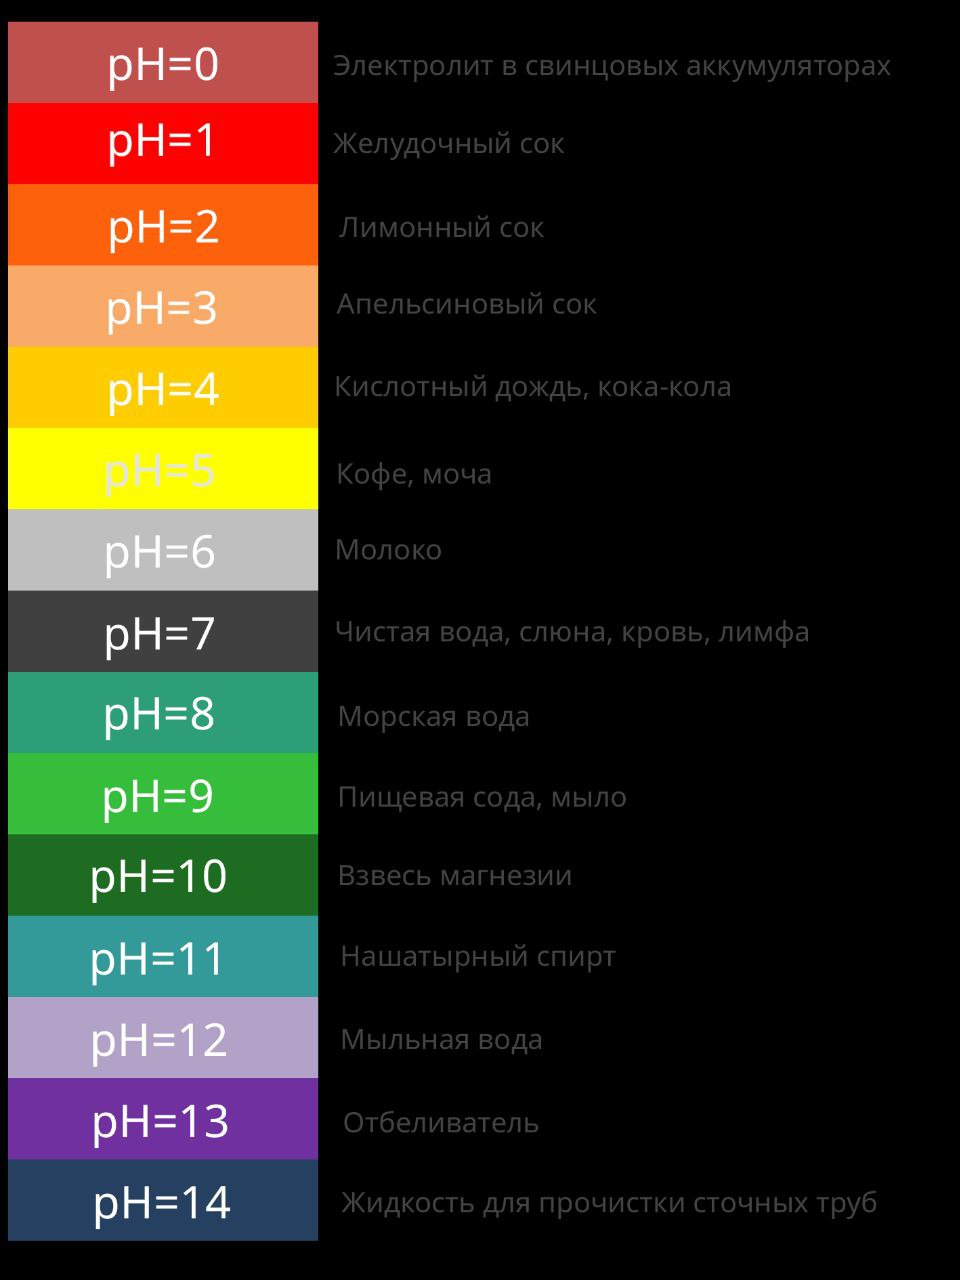

Просмотрели влияет ли ph на пригодность воды

In [19]:
df['Sulfate'].fillna(df['Sulfate'].mean(),inplace=True)

Заполнили пустые значения в столбцах ph и Sulfate  средним значением

In [20]:
for  col in df.columns:
    print((col, df[col].isna().sum() / df.shape[0]))

('ph', 0.0)
('Hardness', 0.0)
('Solids', 0.0)
('Chloramines', 0.0)
('Sulfate', 0.0)
('Conductivity', 0.0)
('Organic_carbon', 0.0)
('Trihalomethanes', 0.0)
('Turbidity', 0.0)
('Potability', 0.0)


Заполнение прошло успешно

<Axes: xlabel='Potability'>

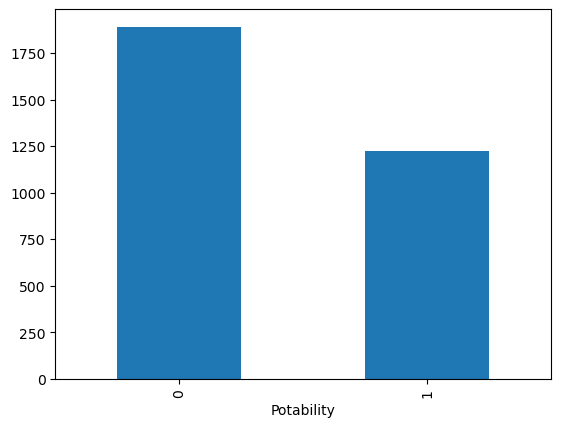

In [21]:
df['Potability'].value_counts(normalize=False).plot.bar()

<Axes: ylabel='proportion'>

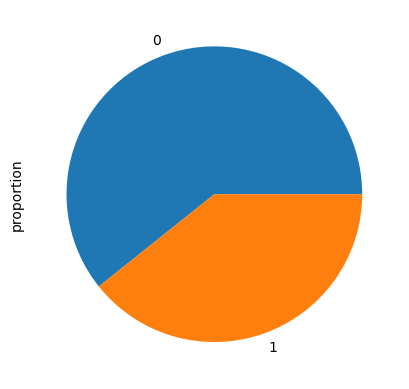

In [22]:
df['Potability'].value_counts(normalize=True).plot.pie()

Можем заметить что данные не сбалансированы: воды непригодной для питья в датафрейме больше

Взглянем на нормальность распределения каждого признака

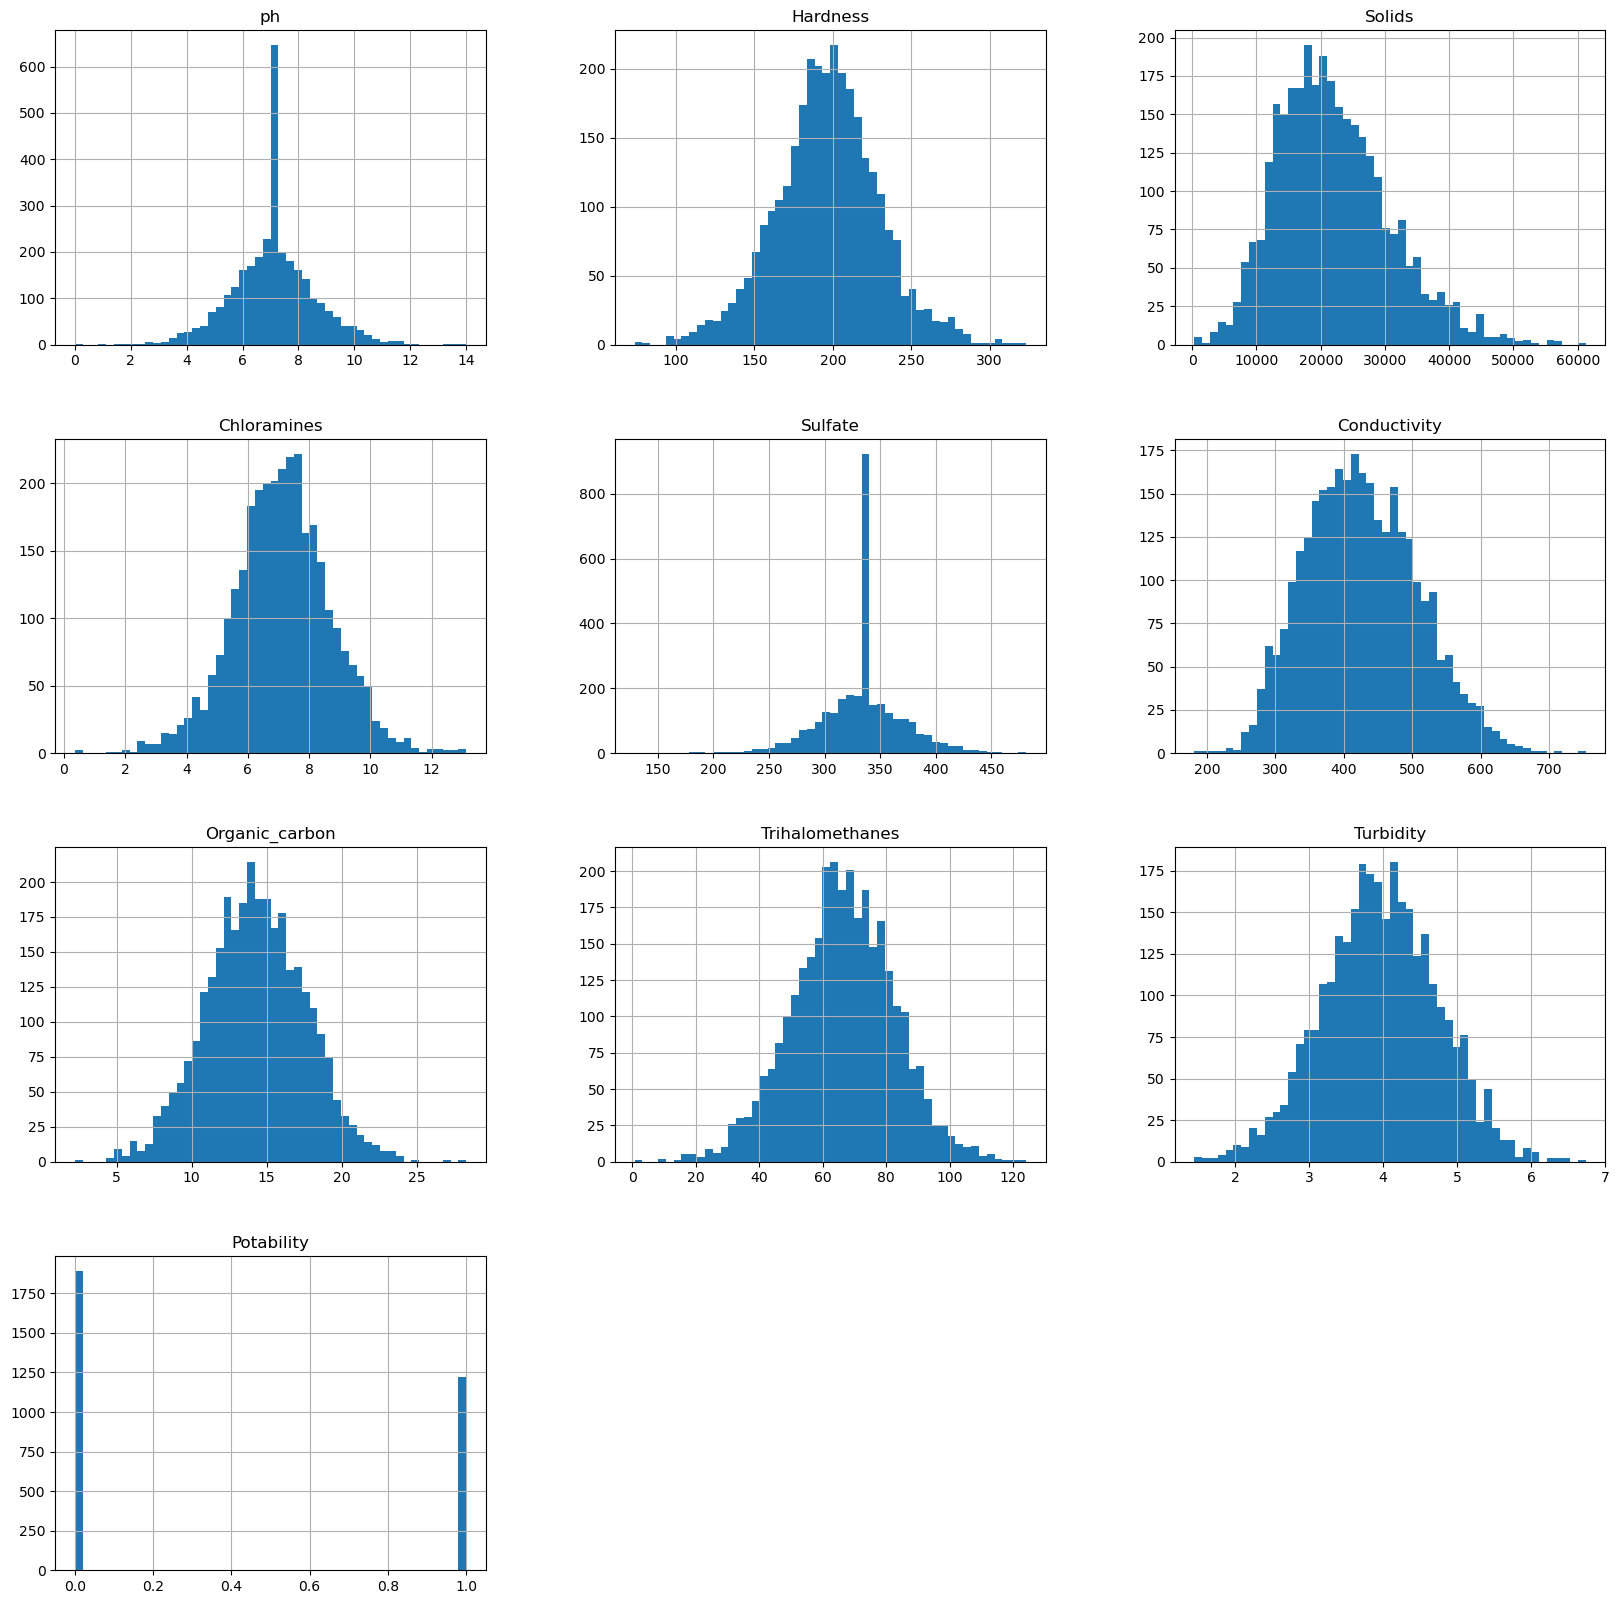

In [23]:
df.hist(figsize=(20,20), bins=50);

Столбец Solids ненормально распределен, поэтому сделаем так чтобы распределение было нормальным

In [24]:
def outlier_analysis_df(df, col):
    outlier_dict = {}

    # Selected column
    column_data = df[col]

    sorted_data = sorted(column_data)

    # Calculate Q1 and Q3
    q1 = np.percentile(sorted_data, 25)
    q3 = np.percentile(sorted_data, 75)

    # IQR (Interquartile Range)
    iqr = q3 - q1

    # Lower and Upper outlier sınırlarını hesapla
    alt_sinir = q1 - 1.5 * iqr
    ust_sinir = q3 + 1.5 * iqr

    # Find Outliers
    outliers = [x for x in sorted_data if x < alt_sinir or x > ust_sinir]
    df_copy = df.copy()
    df_copy[col] = np.where((df_copy[col] < alt_sinir) | (df_copy[col] > ust_sinir), (q1 + q3) / 2, df_copy[col])

    outlier_dict[col] = outliers

    return df_copy, outlier_dict

Применяем функцию

In [25]:
df, outliers_dict = outlier_analysis_df(df, 'Solids')

Посмотрим как изменился график

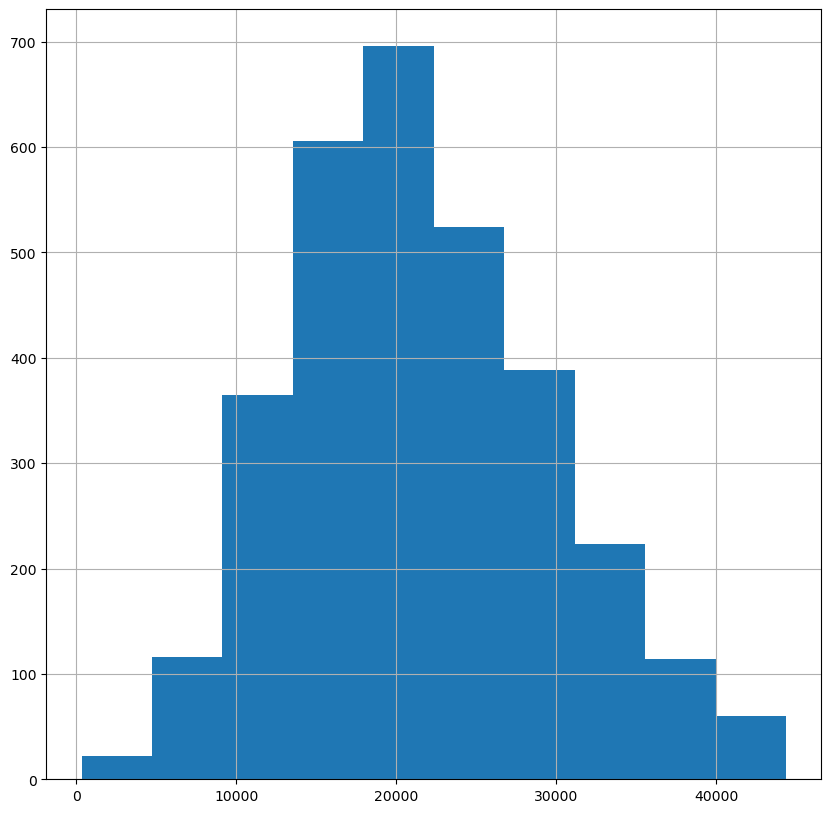

In [26]:
df["Solids"].hist(figsize=(10,10));

<Axes: ylabel='Density'>

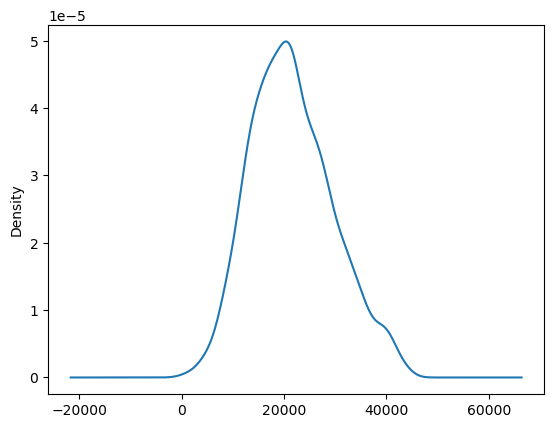

In [27]:
df['Solids'].plot.density()

Ситуация явно улучшилась

Построим для каждого признака ящик с усами

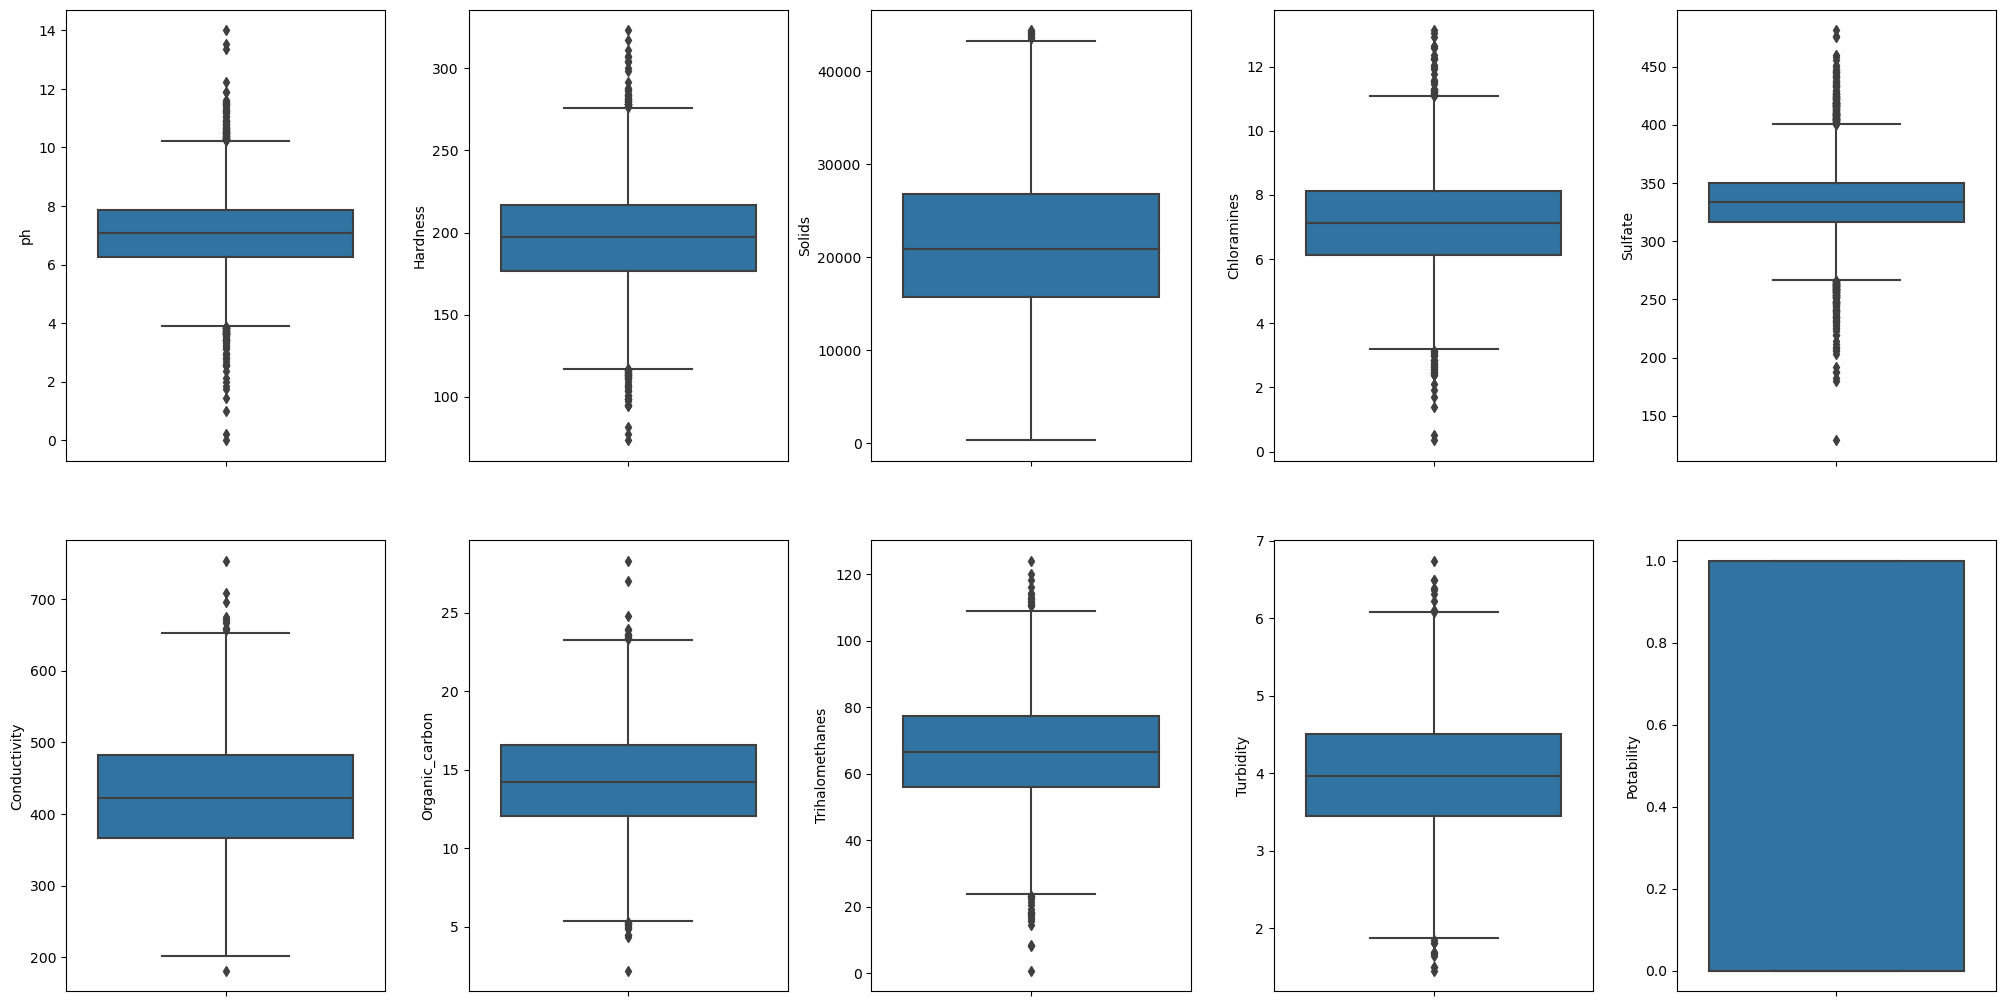

In [28]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

plt.savefig("outliers_boxplot.png")

Можем заметить, что на графиках есть множество выбросов, которые таковыми не являются

Взглянем на зависимость признаков 

<Axes: >

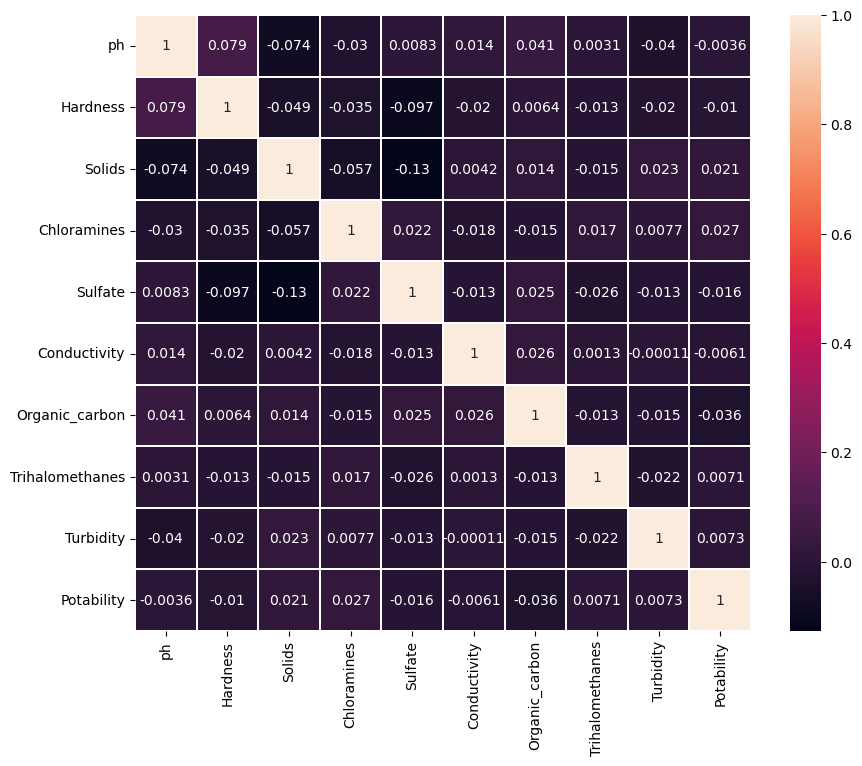

In [29]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, square=True, annot=True, linewidths=.3)

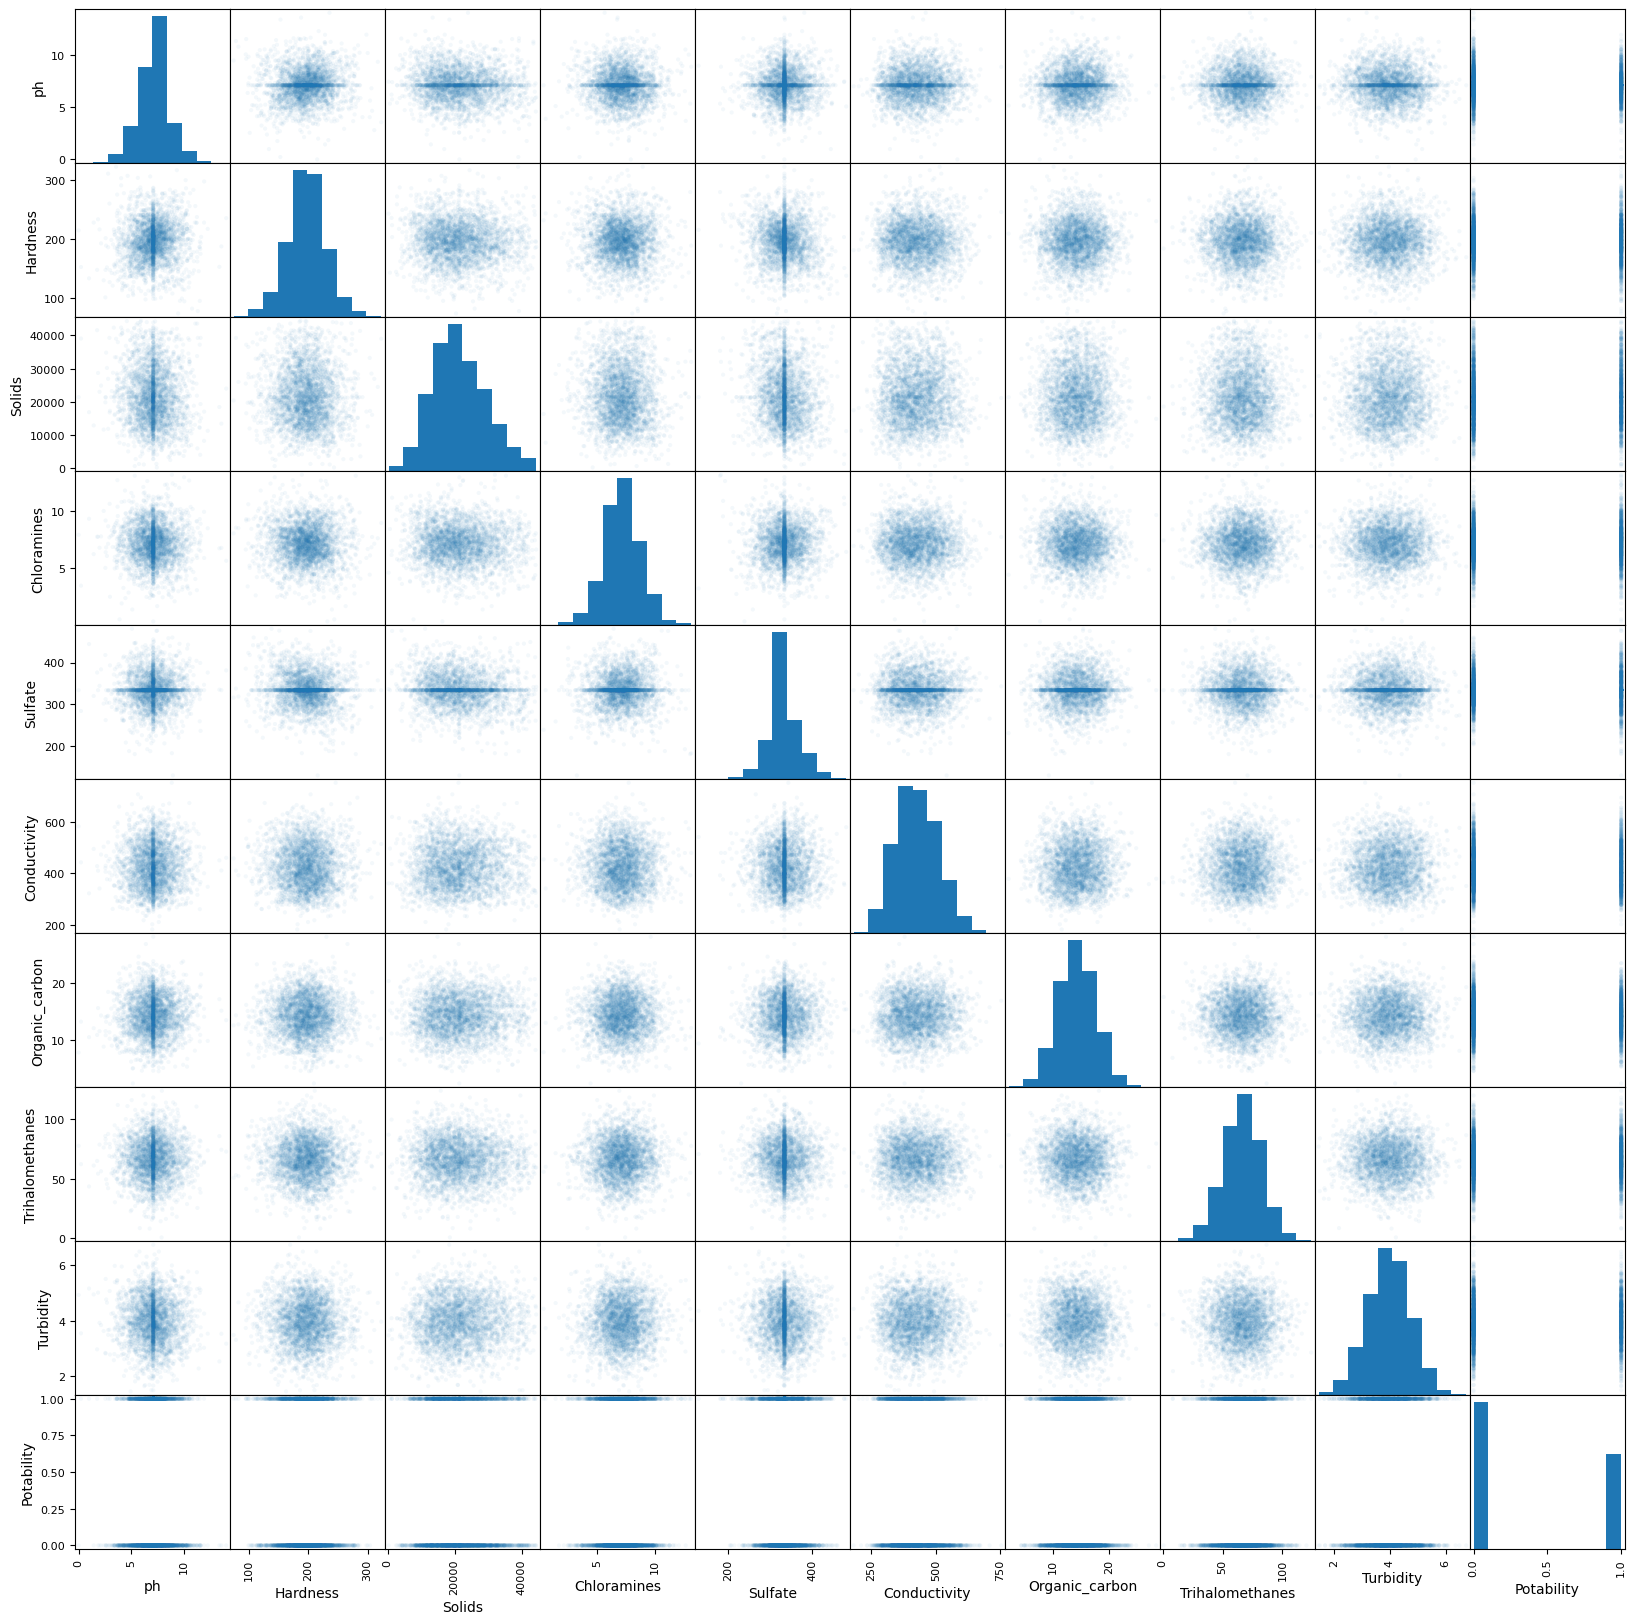

In [30]:
scatter_matrix(df, alpha=0.05, figsize=(20, 20));

Признаки не коррелируют между собой

## Modeling

Обозначаем целевую переменную

In [31]:
y = df['Potability']

И выделяем все нужные признаки для обучения

In [32]:
del df['Potability']
X = df.copy()

Разделяем выборку на обучающую и тестовую 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

Смотрим на размеры выборок

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2086, 9) (1028, 9) (2086,) (1028,)


### KNeighborsClassifier (Классификация ближайших соседей)

Начнём с обучения KNN, так как этот алгоритм довольно прост и легко реализуем, нечуствителен к выбросам и вообще довольно универсален.

In [35]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 7.2 ms


KNeighborsClassifier()

Делаем предсказание и выводим предсказание и тестовую выборку в виде масивов

In [36]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0],
      dtype=int64)

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

Посмотрим на accuracy_score 

In [37]:
y_train_predict = knn.predict(X_train)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, knn_pred_test, normalize=True))

train accuracy:  0.7075743048897412
test accuracy:  0.5729571984435797


Модель обучилась не очень хорошо, но accuracy в нашем случае не очень подходит для оценки обучения модели  
Поэтому для каждой обученной модели выведем classification report

In [38]:
knn_accuracy = accuracy_score(y_test, knn_pred_test)

In [39]:
print(classification_report(y_test, knn_pred_test))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       624
           1       0.44      0.32      0.37       404

    accuracy                           0.57      1028
   macro avg       0.53      0.53      0.52      1028
weighted avg       0.55      0.57      0.56      1028



Для наглядности ещё построим ROC кривую

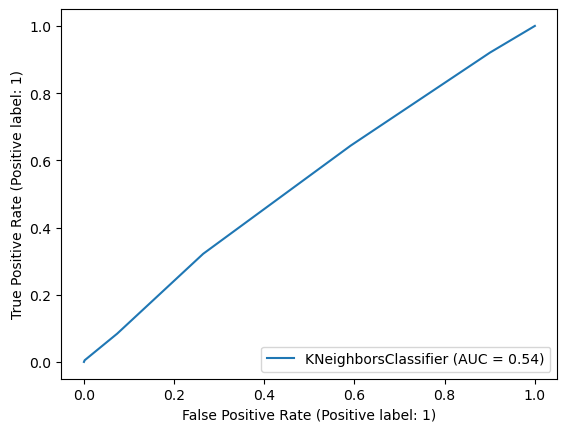

In [40]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

Метод ближайших соседей хорошо предсказывает непитьевую воду, но плохо питьевую.

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

Далее обучим GNB, так как он хорошо работает, если признаки независимы или слабо коррелированы.  
Также он не требователен к размеру  обучающих данных

In [41]:
%%time

gnb = GaussianNB()
gnb.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 3.55 ms


GaussianNB()

Делаем предсказание и выводим предсказание и тестовую выборку в виде масивов

In [42]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

Посмотрим на accuracy_score

In [43]:
y_train_predict = gnb.predict(X_train)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, gnb_pred_test, normalize=True))

train accuracy:  0.6222435282837967
test accuracy:  0.6118677042801557


In [44]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

Выводим classification report

In [45]:
print(classification_report(y_test, gnb_pred_test))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       624
           1       0.51      0.23      0.32       404

    accuracy                           0.61      1028
   macro avg       0.57      0.54      0.52      1028
weighted avg       0.59      0.61      0.57      1028



Построим ROC кривую

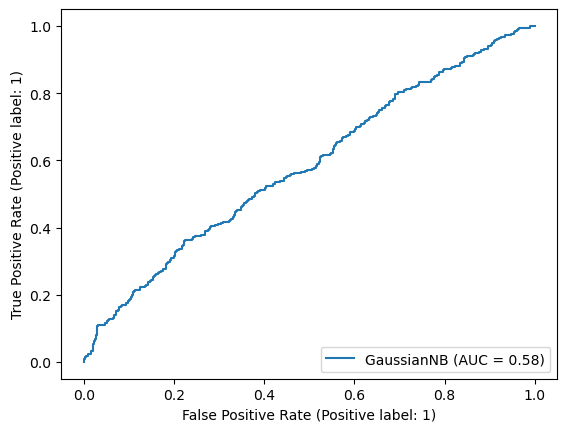

In [46]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

Метод Наивного Байеса хорошо предсказывает непитьевую воду, но плохо питьевую.  
Но несмотря на это, это метод уже лучше предсказывает, чем метод ближайших соседей

### Random Forest Classifier

Последней моделью будет RFC, так как он довольно гибок и подходит для решения множества задач классификации.  
Хорошо подходит для тех, случаев, когда классы несбалансированны.  
Имеют высокую точность предсказания, которая сравнима с результатами градиентного бустинга.  
Не требует тщательной настройки параметров.

In [47]:
%%time

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

CPU times: total: 906 ms
Wall time: 2.04 s


RandomForestClassifier()

Делаем предсказание и выводим предсказание и тестовую выборку в виде масивов

In [48]:
rfc_pred_test = rfc.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

Выводим accuracy_score

In [49]:
y_train_predict = rfc.predict(X_train)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, rfc_pred_test, normalize=True))

train accuracy:  1.0
test accuracy:  0.6546692607003891


In [50]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)

Выводим classification report

In [51]:
print(classification_report(y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       624
           1       0.64      0.28      0.39       404

    accuracy                           0.65      1028
   macro avg       0.65      0.59      0.57      1028
weighted avg       0.65      0.65      0.61      1028



Запишем в отдельные переменные метрики, чтобы потом сравнить старую и новую модель

In [52]:
rfc_precision = precision_score(y_test, rfc_pred_test, average='macro')
rfc_recall = recall_score(y_test, rfc_pred_test, average='macro')
rfc_f1 = f1_score(y_test, rfc_pred_test, average='macro')

Построим ROC кривую

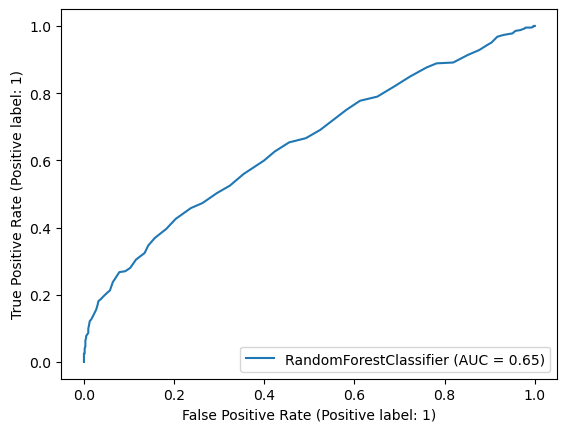

In [53]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

In [54]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy]

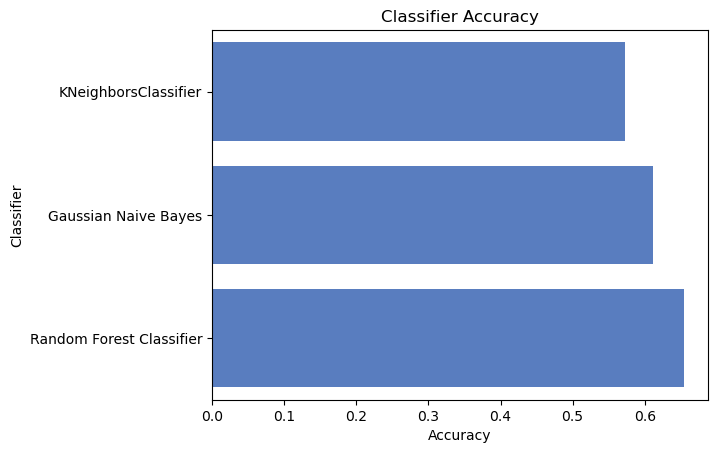

In [55]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

Из всех 3-х моделей обучения Random Forest Classifier предсказывает лучше всех данные о воде. Поэтому мы возьмем его и будем улучшать его параметры для дальнейшего обучения.

### Настройка гиперпараметров

Так как был выбран RFC, подберём оптимальное кол-во деревьев для модели, используя GridSearchCV

In [56]:
%%time
# Hyperparameter tuning
param_grid = {'n_estimators': [100, 300, 600, 900, 1200]}

rfc_1 = RandomForestClassifier(random_state=40)

grid_search = GridSearchCV(estimator=rfc_1, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_estimators': 900}
CPU times: total: 2min 31s
Wall time: 4min 8s


Оптимальным кол-вом деревьев в лесу оказалось 1200  
Обучим новую модель, указав 1200 деревьев в параметрах

In [57]:
rfc_1 = RandomForestClassifier(n_estimators=900)
rfc_1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=900)

Выведем classififcation report

In [58]:
rfc1_pred_test = rfc_1.predict(X_test)
print(classification_report(y_test, rfc1_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       624
           1       0.66      0.29      0.41       404

    accuracy                           0.66      1028
   macro avg       0.66      0.60      0.59      1028
weighted avg       0.66      0.66      0.62      1028



In [59]:
rfc1_precision = precision_score(y_test, rfc1_pred_test, average='macro')
rfc1_recall = recall_score(y_test, rfc1_pred_test, average='macro')
rfc1_f1 = f1_score(y_test, rfc1_pred_test, average='macro')

In [60]:
classifiers =["RFC old", "RFC new"]
log_cols = ["Recall", "Precision", "F1-Score"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log.set_index('Classifier', inplace=True)

log["Recall"] = [rfc_recall, rfc1_recall]
log['Precision'] = [rfc_precision, rfc1_precision]
log["F1-Score"] = [rfc_f1, rfc1_f1]

log

,Recall,Precision,F1-Score
Classifier,,,
RFC old,0.588569,0.648234,0.574153
RFC new,0.598399,0.662513,0.586240


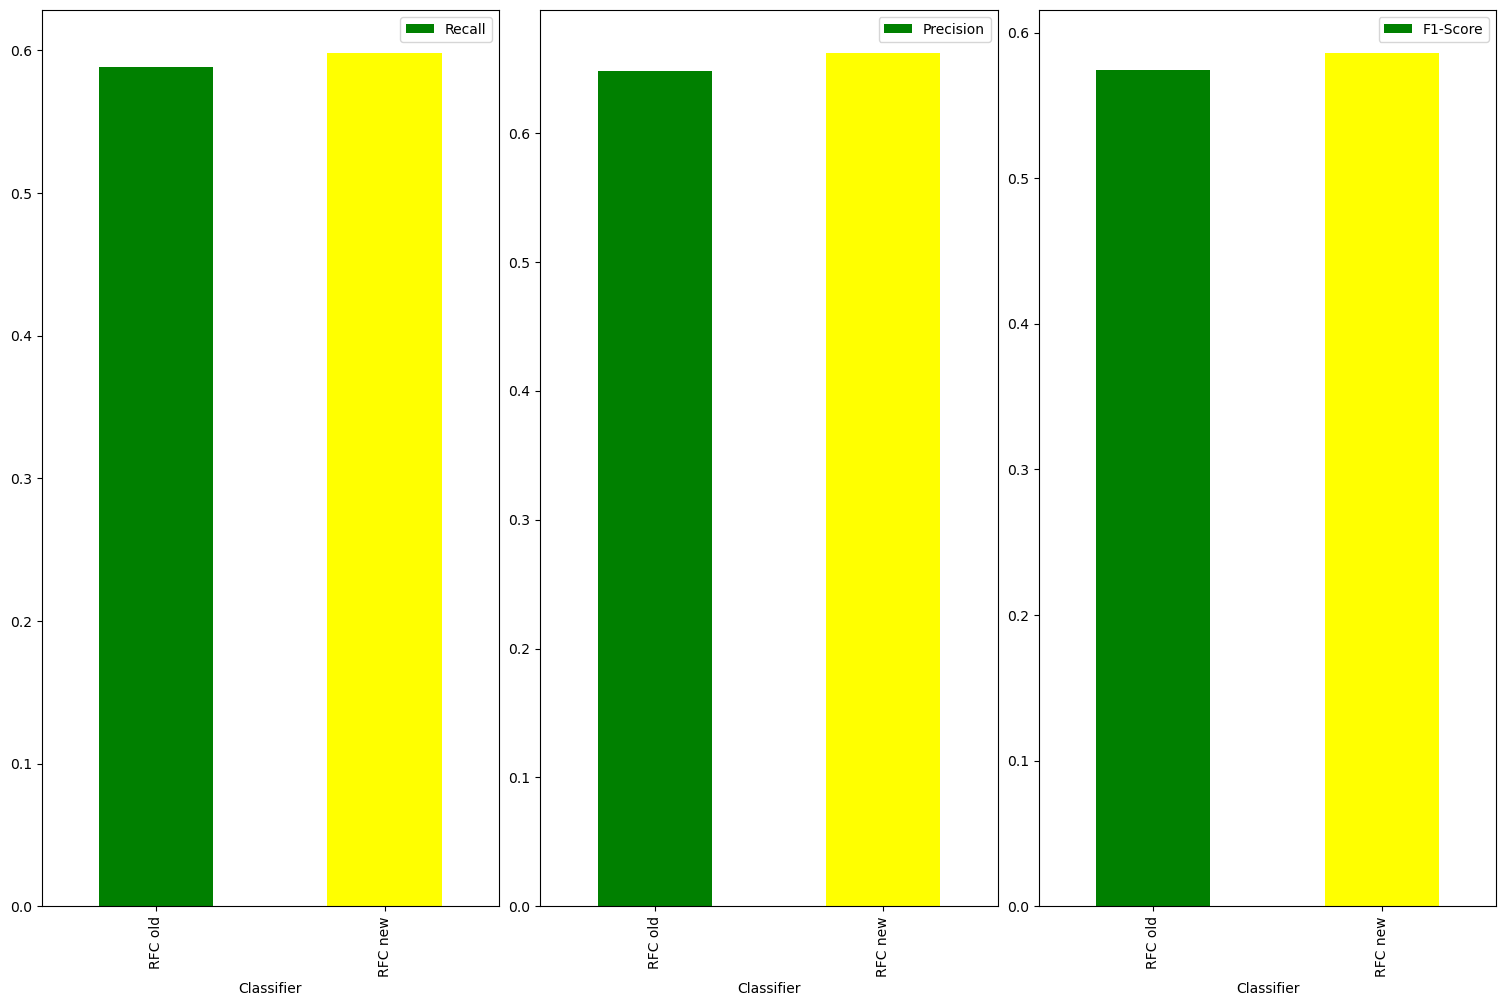

In [61]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15,10))
index = 0
ax = ax.flatten()

for col, value in log.items():
    log[col].plot.bar(ax=ax[index], legend=True, color=['green','yellow'])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Сравнивая метрики новой и старой модели можно сказать, что они почти никак не поменялись  
Модель стала лучше работать с водой, пригодной для питья

## Вывод
Провели разведочный анализ данных, выяснили что у нас есть признаки где имеются пустые значения, после чего удалили пустые значения в столбце Trihalomethanes, так как их доля была слишком мала, а также вывели среднее значение столбцов ph и Sulfate и заполнили ими пустые значения.

Заметили, что есть выбросы, которые таковыми не являются. Посмотрели то что классы не сбалансированы, корреляции не наблюдается.

Провели обучение 3-х моделей и сравнили их друг с другом:
1. KNN
  - точность предсказания пригодности воды (1) - 0,44;
  - точность предсказания непригодности воды (0) - 0,63;
  - полнота предсказания пригодности воды (1) - 0,32;
  - полнота предсказания непригодности воды (0) - 0,74;
  - f1-score пригодности воды (1) - 0,37;
  - f1-score пригодности воды (0) - 0,68;
2. GNB
  - точность предсказания пригодности воды (1) - 0,51;
  - точность предсказания непригодности воды (0) - 0,63;
  - полнота предсказания пригодности воды (1) - 0,23;
  - полнота предсказания непригодности воды (0) - 0,86;
  - f1-score пригодности воды (1) - 0,32;
  - f1-score пригодности воды (0) - 0,73;
3. GNB
  - точность предсказания пригодности воды (1) - 0,64;
  - точность предсказания непригодности воды (0) - 0,66;
  - полнота предсказания пригодности воды (1) - 0,28;
  - полнота предсказания непригодности воды (0) - 0,90;
  - f1-score пригодности воды (1) - 0,39;
  - f1-score пригодности воды (0) - 0,76;

Построили для каждой модели Roc-кривую.

Изучив три модели обучения мы выяснили, что самой наилучшей является "Random Forest Classifier" и провели настройку гиперпараметров для его улучшения. А также сравнили старые значения с новыми.